In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\Muhammad Ali\Desktop\Devs Hub\Mall_Customers.csv")


df.head(), df.shape


(   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
 0           1    Male   19                  15                      39
 1           2    Male   21                  15                      81
 2           3  Female   20                  16                       6
 3           4  Female   23                  16                      77
 4           5  Female   31                  17                      40,
 (200, 5))

In [9]:
# Checking Info
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# Checking missing values
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
# Summary statistics
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


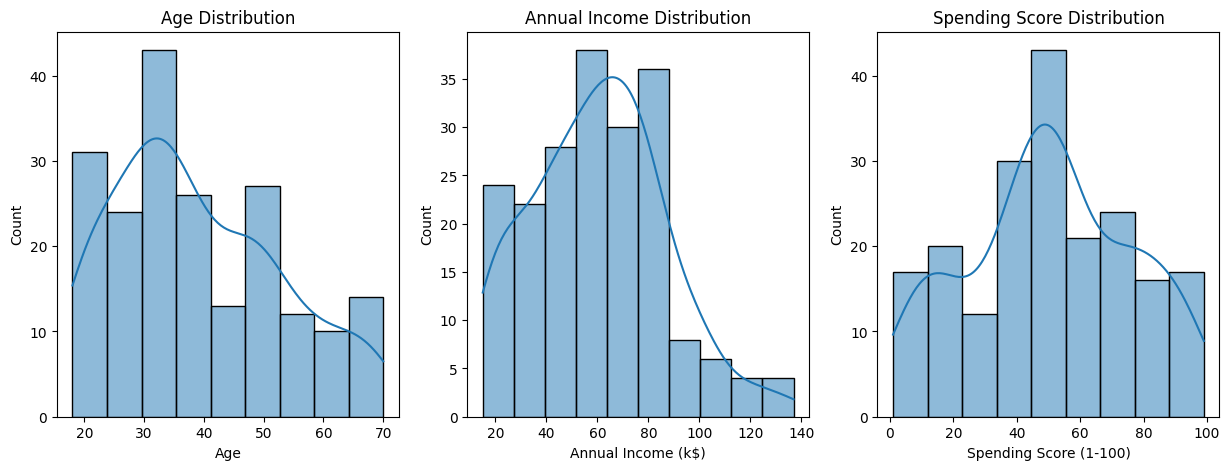

In [11]:
# Visualize distributions
fig, axes = plt.subplots(1, 3, figsize=(15,5))

sns.histplot(df['Age'], kde=True, ax=axes[0])
axes[0].set_title("Age Distribution")

sns.histplot(df['Annual Income (k$)'], kde=True, ax=axes[1])
axes[1].set_title("Annual Income Distribution")

sns.histplot(df['Spending Score (1-100)'], kde=True, ax=axes[2])
axes[2].set_title("Spending Score Distribution")

plt.show()


In [12]:
# Clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


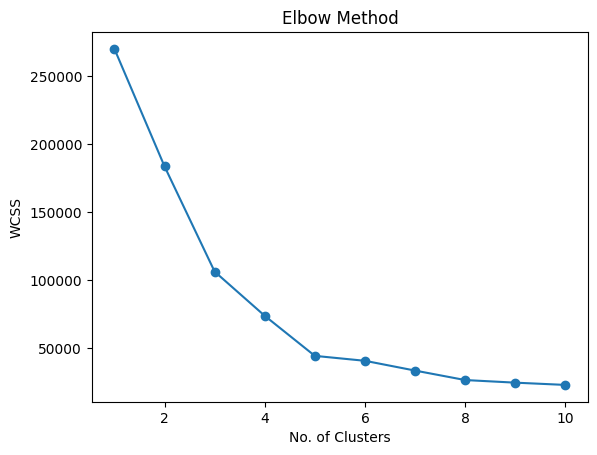

In [13]:
# Elbow method
from sklearn.cluster import KMeans

wcss = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.show()


In [14]:
# Kmeans
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


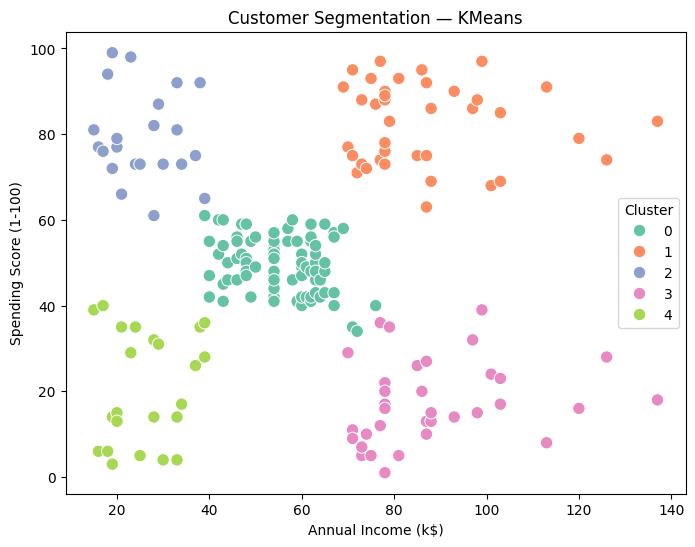

In [15]:
# Visualize clusters
plt.figure(figsize=(8,6))

sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set2',
    data=df,
    s=80
)

plt.title("Customer Segmentation — KMeans")
plt.show()


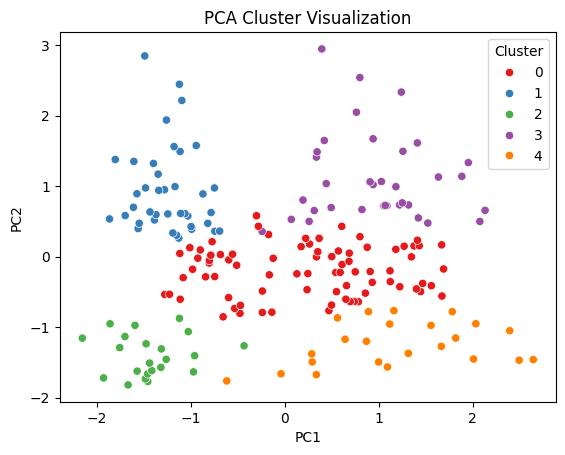

In [16]:
# Visualization 

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

scaled = StandardScaler().fit_transform(df[features])

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled)

df['PC1'] = pca_data[:,0]
df['PC2'] = pca_data[:,1]

sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set1', data=df)
plt.title("PCA Cluster Visualization")
plt.show()


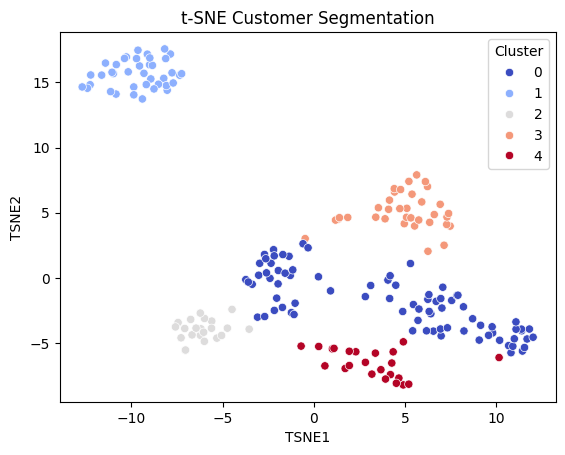

In [18]:
#t-SNE visualization

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_data = tsne.fit_transform(scaled)

df['TSNE1'] = tsne_data[:,0]
df['TSNE2'] = tsne_data[:,1]

sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', palette='coolwarm', data=df)
plt.title("t-SNE Customer Segmentation")
plt.show()
